<a href="https://colab.research.google.com/github/EvelyneBomfim/Python-Redes_Neurais-Classificacao_Caes_Gatos/blob/main/Classificacao_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais - Classificação de imagem

## Desafio do projeto

Projeto de Transfer Learning em Python 
O projeto consiste em aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB.  

Para exemplo, utilizaremos o seguinte projeto que realiza Transfer Learning com o Dataset do MNIST: 
https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb 

O dataset utilizado engloba duas classes: gatos e cachorros. Uma descrição da base de dados pode ser visualizada neste link: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs. 

Já o dataset para download pode ser acessado por meio deste outro link:

https://www.microsoft.com/en-us/download/details.aspx?id=54765. 

 

Observações: Neste projeto, você pode usar sua própria base de dados (exemplo: fotos suas, dos seus pais, dos seus amigos, dos seus animais domésticos, etc), o exemplo de gatos e cachorros, pode ser substituído por duas outras classes do seu interesse. O Dataset criado em nosso projeto anterior, pode ser utilizado agora.  

O projeto deve ser enviado para o GitHub da DIO: https://github.com/digitalinnovationone.

## Importando o dataset
Importando o dataset do Kaggle

In [1]:
# Vinculando o token do meu perfil do Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# Importando dataset Dogs-vs-Cats
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:34<00:00, 37.4MB/s]
100% 1.06G/1.06G [00:34<00:00, 33.0MB/s]


In [3]:
# Extraindo os arquivos do dataset zipado
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Importando bibliotecas

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,BatchNormalization,Dropout

## Separando datasets para treino

In [2]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalizando o conjunto de dados

In [3]:
def process (image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train = train.map(process)
test = test.map(process)

## Modelo CNN

In [4]:
# Criando o modelo
model = Sequential()

# Convolution layer

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2, padding='valid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [6]:
model.add(Flatten())

# Fully connected layers

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
625/625 [==============================] - 85s 135ms/step - loss: 0.8784 - accuracy: 0.6213 - val_loss: 0.5549 - val_accuracy: 0.7114
Epoch 2/10
625/625 [==============================] - 76s 122ms/step - loss: 0.5115 - accuracy: 0.7499 - val_loss: 0.5467 - val_accuracy: 0.7250
Epoch 3/10
625/625 [==============================] - 74s 117ms/step - loss: 0.4406 - accuracy: 0.7970 - val_loss: 0.6213 - val_accuracy: 0.7440
Epoch 4/10
625/625 [==============================] - 73s 117ms/step - loss: 0.3754 - accuracy: 0.8304 - val_loss: 0.4059 - val_accuracy: 0.8148
Epoch 5/10
625/625 [==============================] - 74s 117ms/step - loss: 0.3109 - accuracy: 0.8702 - val_loss: 0.5647 - val_accuracy: 0.7748
Epoch 6/10
625/625 [==============================] - 73s 116ms/step - loss: 0.2174 - accuracy: 0.9118 - val_loss: 0.5492 - val_accuracy: 0.8014
Epoch 7/10
625/625 [==============================] - 75s 119ms/step - loss: 0.1448 - accuracy: 0.9459 - val_loss: 0.6090 - val_ac

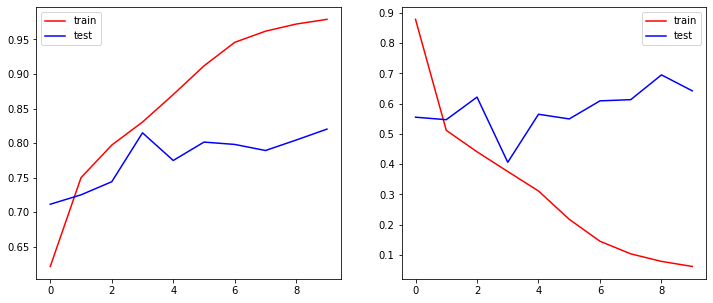

In [14]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['accuracy'], color='red', label='train')
ax1.plot(history.history['val_accuracy'], color='blue', label='test')
ax1.legend()

ax2.plot(history.history['loss'], color='red', label='train')
ax2.plot(history.history['val_loss'], color='blue', label='test')
ax2.legend()

plt.show()

### Predição

In [19]:
# Passando o caminho de cada imagem para um dataframe
import os
import pandas as pd

dt = pd.DataFrame(columns=['arquivo'], index=[])
i = 1
pasta = './test'

for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        dt.loc[i] = os.path.join(diretorio, arquivo)
        #print(os.path.join(diretorio, arquivo))
        i+=1

In [53]:
# Gerando uma amostra de 100 imagens
amostra = dt.sample(500)

# Zerando o index
amostra.reset_index(drop=True, inplace=True)

In [54]:
# Real 

amostra['real'] = 0

for i in range(len(amostra['arquivo'])):
    if (amostra['arquivo'][i][7:10]=='dog'):
      amostra['real'][i] = 1 # cachorro
    else:
      amostra['real'][i] = 0 # gato

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
# Predição

import cv2
amostra['predicao'] = 0

for i in range(len(amostra['arquivo'])):
  # Predizendo cada imagem
  test_img = cv2.imread(amostra['arquivo'][i])
  test_img = cv2.resize(test_img, (256,256))
  test_input = test_img.reshape((1,256,256,3))
  model.predict(test_input)

  # Colocando a predição no dataframe
  if (model.predict(test_input))==0:
    amostra['predicao'][i] = 0 # se gato
  else:
    amostra['predicao'][i] = 1 # se cachorro

In [56]:
# metricas de validação

from sklearn.metrics import classification_report 

print(classification_report(amostra['real'], amostra['predicao']))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       245
           1       0.76      0.52      0.62       255

    accuracy                           0.67       500
   macro avg       0.70      0.68      0.67       500
weighted avg       0.70      0.67      0.67       500



### Verificando a predição visualmente

Lembrando que:

cachorro = 1 | gato = 0

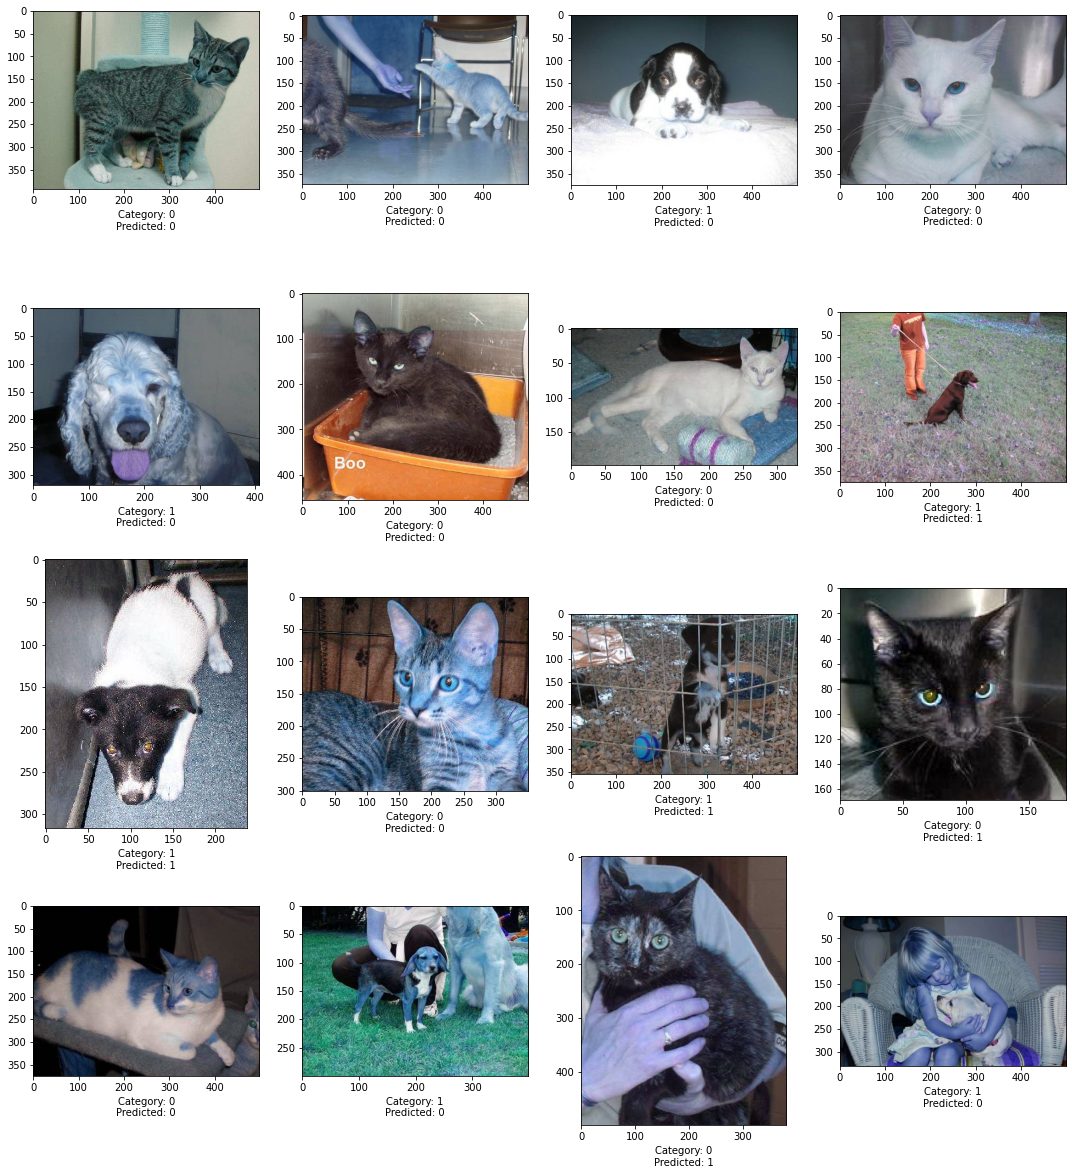

In [58]:
import numpy as np

sample_test = amostra.values[np.random.randint(0, len(amostra), 16)]
sample_test

plt.figure(figsize=(15, 17))
for index, row in enumerate(sample_test):
    filename = row[0]
    category = row[1]
    predict = row[2]
    image = cv2.imread(filename)
    plt.subplot(4, 4, index+1)
    plt.imshow(image)
    plt.xlabel('Category: {0}\nPredicted: {1}'.format(category, predict) )
plt.tight_layout()
plt.show()